In [1]:
%matplotlib inline

In [4]:
import numpy as np

data = np.load('firing.npz')

In [7]:
f = data['fire']

In [8]:
f.shape

(20L, 2000L, 100L)

In [14]:
from NeuroTools.signals.spikes import SpikeTrain

C:\Python27\lib\site-packages\matplotlib\__init__.py:1156: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
C:\Python27\lib\site-packages\NeuroTools\__init__.py:125: DependencyWarning: ** interval ** package is not installed.
To have functions using interval please install the package.
website : http://pypi.python.org/pypi/interval/1.0.0

  warnings.warn(get_import_warning(name), DependencyWarning)


In [17]:
f0 = f[0]

In [19]:
def convert_to_spike_times(spikes, times):
    spike_times = []
    for i, t in enumerate(times):
        if spikes[i] > 0:
            spike_times.append(t)
    return spike_times



In [29]:
times = np.arange(2000)
print(convert_to_spike_times(f0[:,1], times))

[3, 7, 12, 16, 21, 25, 29, 34, 38, 43, 47, 52, 56, 61, 65, 70, 75, 79, 84, 88, 93, 98, 102, 107, 112, 117, 121, 126, 131, 136, 140, 145, 150, 155, 160, 165, 170, 175, 179, 184, 189, 194, 199, 204, 209, 215, 220, 225, 230, 235, 240, 245, 250, 256, 261, 266, 271, 277, 282, 287, 292, 298, 303, 308, 314, 319, 325, 330, 335, 341, 346, 352, 357, 363, 368, 374, 380, 385, 391, 396, 402, 408, 413, 419, 425, 431, 436, 442, 448, 454, 460, 465, 471, 477, 483, 489, 495, 501, 507, 513, 519, 525, 531, 537, 543, 549, 555, 561, 567, 574, 580, 586, 592, 599, 605, 611, 617, 624, 630, 636, 643, 649, 656, 662, 669, 675, 682, 688, 695, 701, 708, 714, 721, 728, 734, 741, 747, 754, 761, 768, 774, 781, 788, 795, 801, 808, 815, 822, 829, 835, 842, 849, 856, 863, 870, 877, 884, 891, 898, 905, 912, 919, 926, 933, 940, 947, 954, 961, 968, 975, 983, 990, 997, 1004, 1011, 1018, 1026, 1033, 1040, 1047, 1054, 1062, 1069, 1076, 1084, 1091, 1098, 1106, 1113, 1120, 1128, 1135, 1142, 1150, 1157, 1164, 1172, 1179, 1187, 11

In [30]:
all_times = []
for i in range(100):
    all_times.extend(convert_to_spike_times(f0[:,i], times))

In [36]:
st = SpikeTrain(convert_to_spike_times(f0[:,1], times))

In [38]:
spec, axis = st.frequency_spectrum(time_bin=10)

In [39]:
import pylab


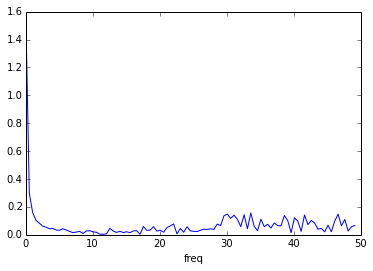

In [44]:
pylab.plot(axis, spec)
pylab.xlabel('freq')

In [83]:
window = np.linspace(0, 1999, 60).astype(int)
print window

[   0   33   67  101  135  169  203  237  271  304  338  372  406  440  474
  508  542  575  609  643  677  711  745  779  813  847  880  914  948  982
 1016 1050 1084 1118 1151 1185 1219 1253 1287 1321 1355 1389 1423 1456 1490
 1524 1558 1592 1626 1660 1694 1727 1761 1795 1829 1863 1897 1931 1965 1999]


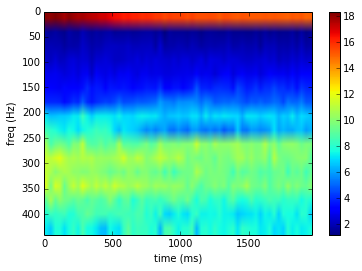

In [95]:
amp_index = 19
neuron_indices = range(100)

total_w = None

for neuron_index in neuron_indices:
    windowed_spec = []
    cs = convert_to_spike_times(f[amp_index][:,neuron_index], times)
    for i in range(len(window)-1):
        st = SpikeTrain(cs, window[i], window[i+1])
        spec, axis = st.frequency_spectrum(time_bin=1)
        windowed_spec.append(spec)
    ws = np.array(windowed_spec)
    if total_w is None:
        total_w = ws
    else:
        total_w += ws

pylab.imshow(total_w.T, extent=(window[0], window[-2], axis[-1], axis[0]), aspect='auto')
pylab.colorbar()
pylab.ylabel('freq (Hz)')
pylab.xlabel('time (ms)')

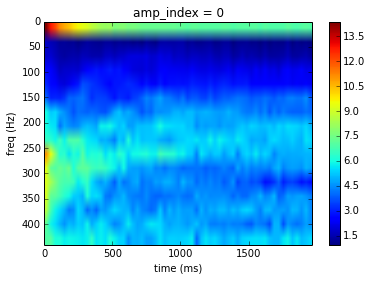

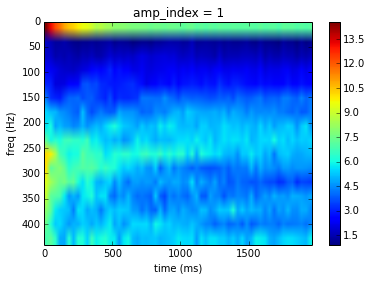

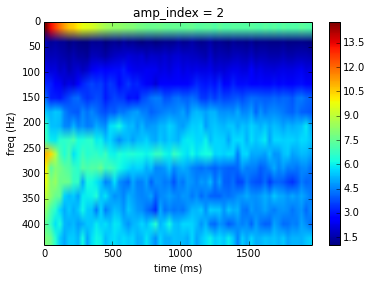

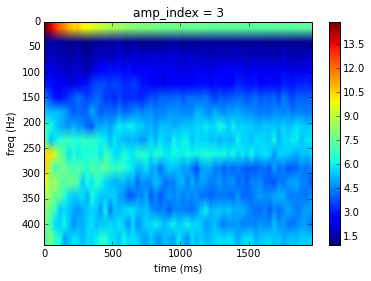

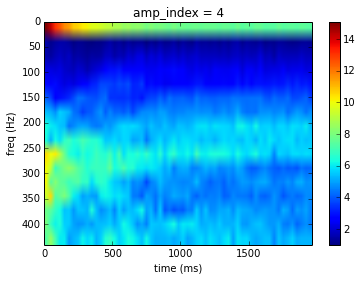

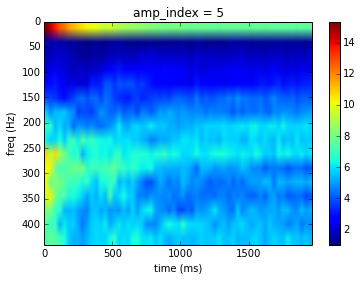

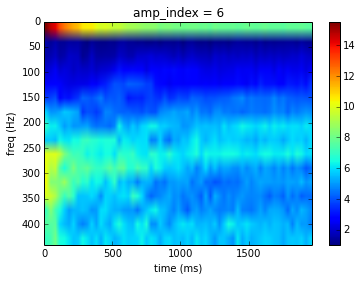

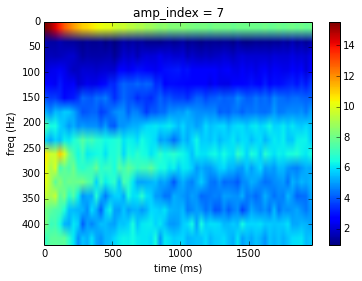

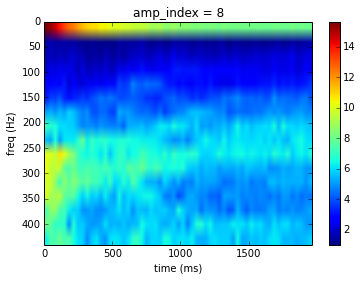

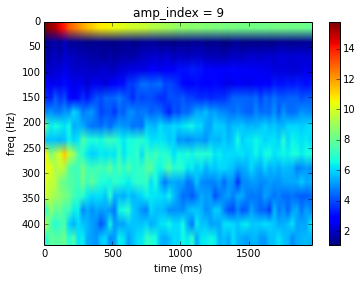

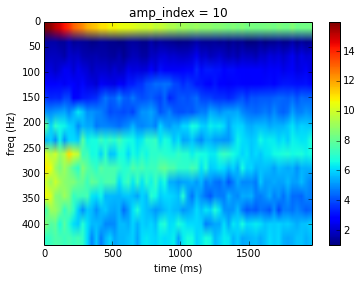

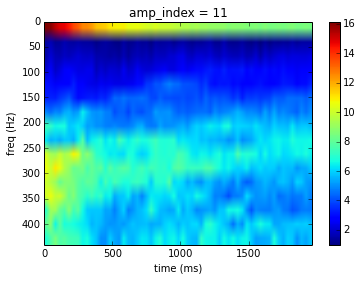

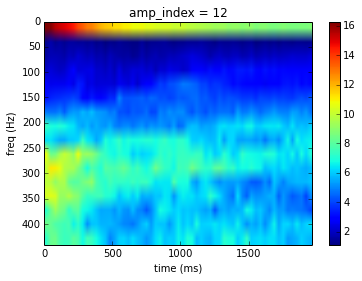

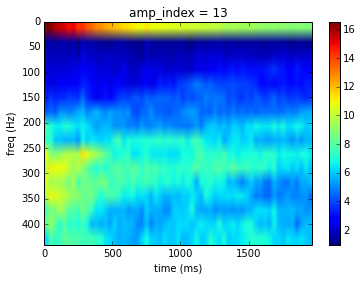

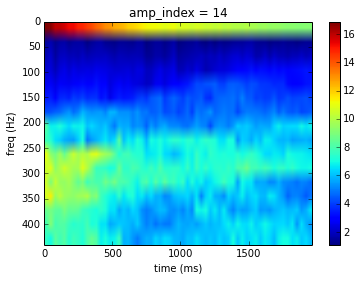

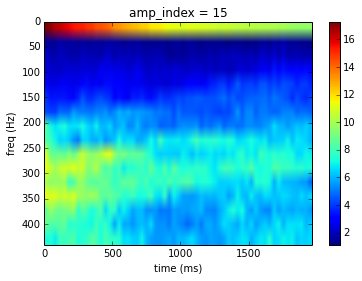

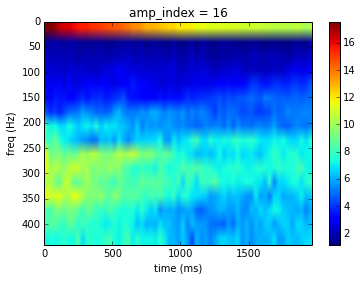

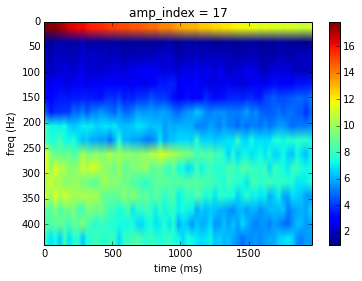

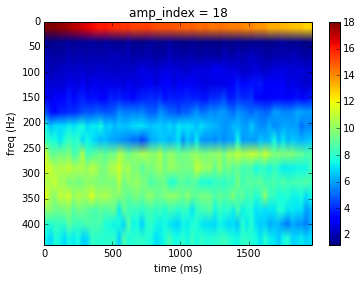

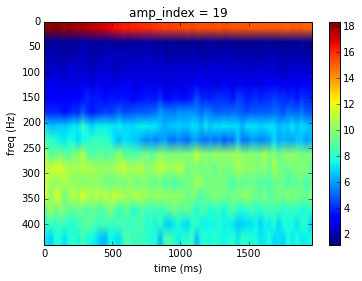

In [96]:
for amp_index in range(20):

    neuron_indices = range(100)

    total_w = None

    for neuron_index in neuron_indices:
        windowed_spec = []
        cs = convert_to_spike_times(f[amp_index][:,neuron_index], times)
        for i in range(len(window)-1):
            st = SpikeTrain(cs, window[i], window[i+1])
            spec, axis = st.frequency_spectrum(time_bin=1)
            windowed_spec.append(spec)
        ws = np.array(windowed_spec)
        if total_w is None:
            total_w = ws
        else:
            total_w += ws

    pylab.imshow(total_w.T, extent=(window[0], window[-2], axis[-1], axis[0]), aspect='auto')
    pylab.colorbar()
    pylab.ylabel('freq (Hz)')
    pylab.xlabel('time (ms)')
    pylab.title('amp_index = %d' % amp_index)
    pylab.show()